## Imports

In [2]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

# Loading data
The dataset used for this training is from [Landslide4Sense](https://github.com/iarai/Landslide4Sense-2022) competition. It is a set of:
 - train images + segmentation masks
 - validation images + segmentation masks
 - test images + segmentation masks

In [3]:
# Dataset paths
DATA_DIR = "/kaggle/input/landslide4sense-2022/Landslide4Sense_2022/"
x_train_dir = os.path.join(DATA_DIR, "train", "img")
y_train_dir = os.path.join(DATA_DIR, "train", "mask")

x_valid_dir = os.path.join(DATA_DIR, "valid", "img")
y_valid_dir = os.path.join(DATA_DIR, "valid", "mask")

x_test_dir = os.path.join(DATA_DIR, "test", "img")
y_test_dir = os.path.join(DATA_DIR, "test", "mask")

train_img_files = sorted(glob(os.path.join(x_train_dir, "*.h5")))
train_mask_files = sorted(glob(os.path.join(y_train_dir, "*.h5")))

valid_img_files = sorted(glob(os.path.join(x_valid_dir, "*.h5")))
valid_mask_files = sorted(glob(os.path.join(y_valid_dir, "*.h5")))

test_img_files = sorted(glob(os.path.join(x_test_dir, "*.h5")))
test_mask_files = sorted(glob(os.path.join(y_test_dir, "*.h5")))

Multispectral data from Sentinel-2: B1, B2, B3, B4, B5, B6, B7, B8, B9, B10, B11, B12.  
Slope data from ALOS PALSAR: B13.  
Digital elevation model (DEM) from ALOS PALSAR: B14.


In [4]:
# Band names
band_names = [
    "B1 (Coastal)", "B2 (Blue)", "B3 (Green)", "B4 (Red)",
    "B5 (Red Edge 1)", "B6 (Red Edge 2)", "B7 (Red Edge 3)", "B8 (NIR)",
    "B9 (Water Vapour)", "B10 (SWIR-Cirrus)", "B11 (SWIR 1)", "B12 (SWIR 2)",
    "B13 (Slope)", "B14 (DEM)"
]

In [5]:
# Load .h5 files
def load_h5(filepath):
    with h5py.File(filepath, 'r') as f:
        return np.array(f[list(f.keys())[0]])

In [6]:
# Load one sample
sample_img = load_h5(train_img_files[0])
sample_mask = load_h5(train_mask_files[0])

print(f"Sample image shape: {sample_img.shape}")
print(f"Sample mask shape: {sample_mask.shape}")

Sample image shape: (128, 128, 14)
Sample mask shape: (128, 128)


In [7]:
# Compute dataset statistics
def compute_dataset_stats(img_files):
    means = []
    stds = []
    for filepath in img_files:
        img = load_h5(filepath)
        means.append(np.mean(img, axis=(0, 1)))
        stds.append(np.std(img, axis=(0, 1)))
    return np.mean(means, axis=0), np.mean(stds, axis=0)

## Distribution of Each Bands

In [8]:
mean_vals, std_vals = compute_dataset_stats(train_img_files)

print("\nBand Statistics (Train set):")
for i, (mean, std) in enumerate(zip(mean_vals, std_vals)):
    print(f"{band_names[i]}: Mean = {mean:.4f}, Std = {std:.4f}")


Band Statistics (Train set):
B1 (Coastal): Mean = 0.9257, Std = 0.0604
B2 (Blue): Mean = 0.9227, Std = 0.1307
B3 (Green): Mean = 0.9541, Std = 0.2204
B4 (Red): Mean = 0.9596, Std = 0.3932
B5 (Red Edge 1): Mean = 1.0228, Std = 0.3332
B6 (Red Edge 2): Mean = 1.0426, Std = 0.3279
B7 (Red Edge 3): Mean = 1.0358, Std = 0.3379
B8 (NIR): Mean = 1.0468, Std = 0.3734
B9 (Water Vapour): Mean = 1.1699, Std = 0.3390
B10 (SWIR-Cirrus): Mean = 1.1736, Std = 0.2099
B11 (SWIR 1): Mean = 1.0495, Std = 0.3895
B12 (SWIR 2): Mean = 1.0370, Std = 0.4816
B13 (Slope): Mean = 1.2511, Std = 0.4447
B14 (DEM): Mean = 1.6495, Std = 0.1612


In [9]:
mean_vals, std_vals = compute_dataset_stats(valid_img_files)

print("\nBand Statistics (Valid set):")
for i, (mean, std) in enumerate(zip(mean_vals, std_vals)):
    print(f"{band_names[i]}: Mean = {mean:.4f}, Std = {std:.4f}")


Band Statistics (Valid set):
B1 (Coastal): Mean = 0.9972, Std = 0.0385
B2 (Blue): Mean = 1.0251, Std = 0.0791
B3 (Green): Mean = 1.0940, Std = 0.1546
B4 (Red): Mean = 1.2119, Std = 0.3328
B5 (Red Edge 1): Mean = 1.2972, Std = 0.3050
B6 (Red Edge 2): Mean = 1.0928, Std = 0.2512
B7 (Red Edge 3): Mean = 1.0214, Std = 0.2429
B8 (NIR): Mean = 1.0396, Std = 0.2746
B9 (Water Vapour): Mean = 1.5841, Std = 0.3893
B10 (SWIR-Cirrus): Mean = 2.3159, Std = 0.8244
B11 (SWIR 1): Mean = 1.2233, Std = 0.3954
B12 (SWIR 2): Mean = 1.3173, Std = 0.5531
B13 (Slope): Mean = 1.2314, Std = 0.4074
B14 (DEM): Mean = 1.5365, Std = 0.1527


In [10]:
mean_vals, std_vals = compute_dataset_stats(test_img_files)

print("\nBand Statistics (Test set):")
for i, (mean, std) in enumerate(zip(mean_vals, std_vals)):
    print(f"{band_names[i]}: Mean = {mean:.4f}, Std = {std:.4f}")


Band Statistics (Test set):
B1 (Coastal): Mean = 0.9932, Std = 0.0422
B2 (Blue): Mean = 1.0205, Std = 0.0867
B3 (Green): Mean = 1.0920, Std = 0.1659
B4 (Red): Mean = 1.2081, Std = 0.3601
B5 (Red Edge 1): Mean = 1.2992, Std = 0.3186
B6 (Red Edge 2): Mean = 1.1002, Std = 0.2559
B7 (Red Edge 3): Mean = 1.0288, Std = 0.2470
B8 (NIR): Mean = 1.0473, Std = 0.2787
B9 (Water Vapour): Mean = 1.6071, Std = 0.3975
B10 (SWIR-Cirrus): Mean = 2.3378, Std = 0.8663
B11 (SWIR 1): Mean = 1.2349, Std = 0.4110
B12 (SWIR 2): Mean = 1.3365, Std = 0.5919
B13 (Slope): Mean = 1.2440, Std = 0.4084
B14 (DEM): Mean = 1.5678, Std = 0.1579


## Plotting Image Band

In [11]:
# Plot selected bands
def plot_image_bands(image, bands):
    fig, axes = plt.subplots(1, len(bands), figsize=(15, 5))
    for i, band in enumerate(bands):
        axes[i].imshow(image[:, :, band])
        axes[i].set_title(f'{band_names[band]}')
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()


In [ ]:
plot_image_bands(sample_img, bands=[3, 2, 1])  # RGB

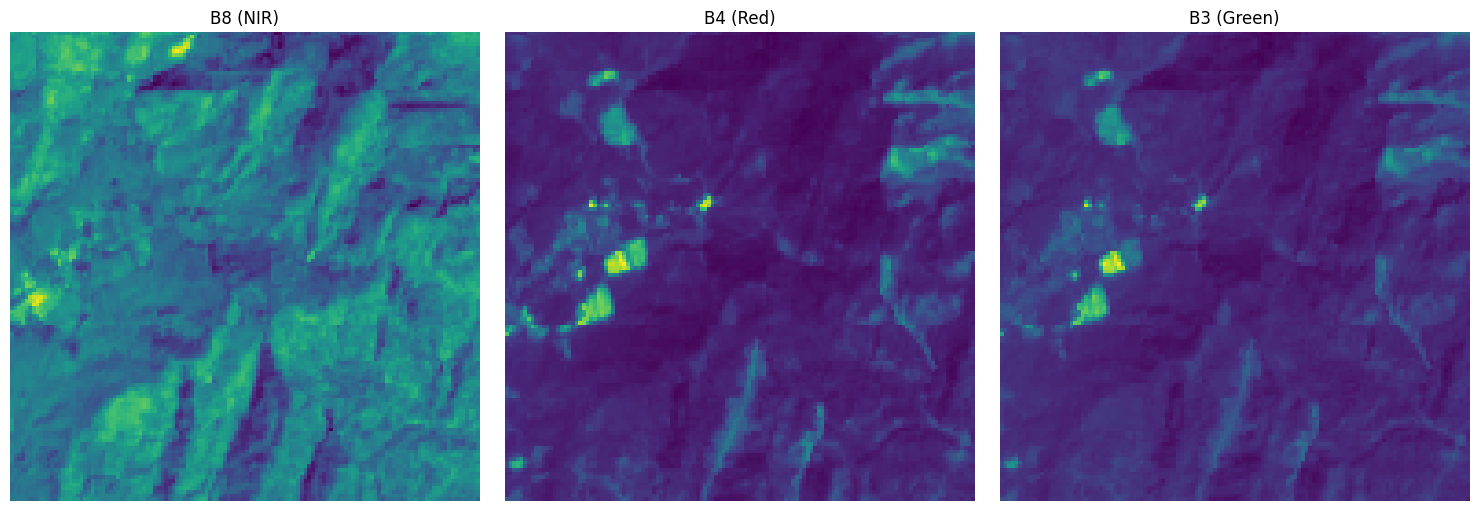

In [ ]:
plot_image_bands(sample_img, bands=[7, 3, 2])  # False Color

In [ ]:
plot_image_bands(sample_img, bands=[12, 13])   # Slope and DEM

In [16]:
def visualize_rgb_mask_overlay(img, mask):
    rgb = img[:, :, [3, 2, 1]]
    rgb_norm = (rgb - rgb.min()) / (rgb.max() - rgb.min())

    # Ensure mask is 2D
    if mask.ndim == 3:
        mask = mask[:, :, 0]

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(rgb_norm)
    plt.title("RGB Composite")

    plt.subplot(1, 2, 2)
    plt.imshow(rgb_norm)
    plt.imshow(mask, cmap='gray', alpha=0.5)
    plt.title("Overlay with Land Slide Mask")
    plt.tight_layout()
    plt.show()


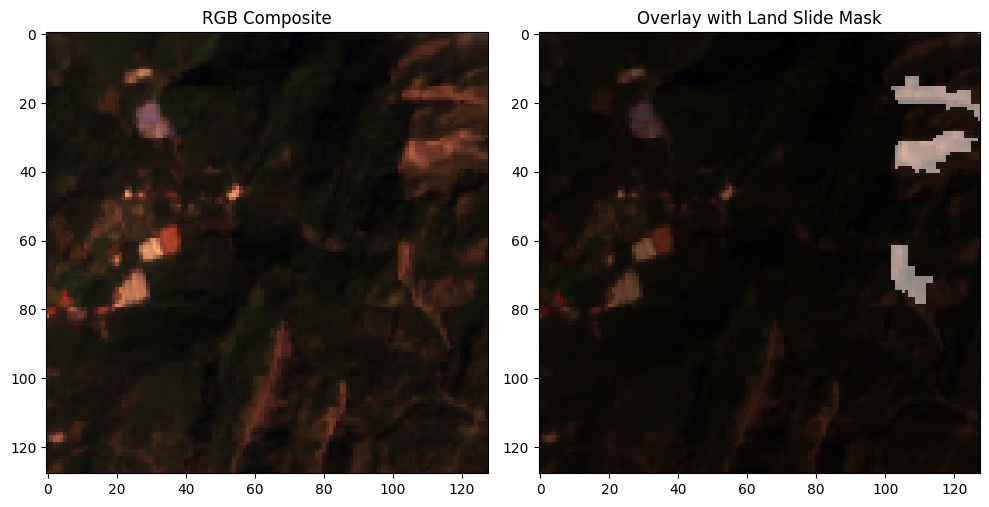

In [17]:
visualize_rgb_mask_overlay(sample_img, sample_mask)

## Binary Mask Statistics

In [20]:
# Binary mask statistics
def binary_mask_stats(mask_files):
    total = 0
    ones = 0
    for f in mask_files:
        mask = load_h5(f)
        ones += np.sum(mask)
        total += mask.size
    print(f"Positive pixels (Landslide): {ones}")
    print(f"Negative pixels (No-Landslide): {total - ones}")
    print(f"Class balance: {100 * ones / total:.2f}% positive")

In [21]:
binary_mask_stats(train_mask_files)

Positive pixels (Landslide): 1442790.0
Negative pixels (No-Landslide): 60800026.0
Class balance: 2.32% positive


In [22]:
binary_mask_stats(valid_mask_files)

Positive pixels (Landslide): 68745.0
Negative pixels (No-Landslide): 3945335.0
Class balance: 1.71% positive


In [23]:
binary_mask_stats(test_mask_files)

Positive pixels (Landslide): 247531.0
Negative pixels (No-Landslide): 12859669.0
Class balance: 1.89% positive


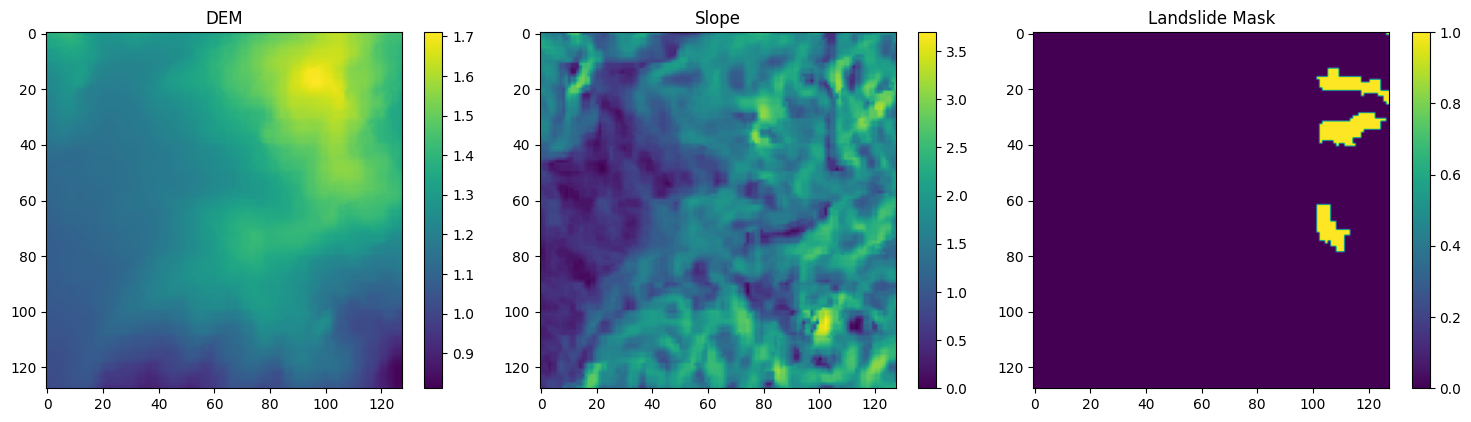

In [25]:
# DEM, Slope, Mask
# Ensure mask is 2D
if sample_mask.ndim == 3:
    sample_mask = sample_mask[:, :, 0]

plt.figure(figsize=(15, 4))
for i, (data, title) in enumerate([
    (sample_img[:, :, 13], "DEM"),
    (sample_img[:, :, 12], "Slope"),
    (sample_mask, "Landslide Mask")]):
    plt.subplot(1, 3, i+1)
    plt.imshow(data, cmap='viridis')
    plt.title(title)
    plt.colorbar()
plt.tight_layout()
plt.show()


In [26]:
# Count images with and without landslide pixels
def count_landslide_images(mask_files, split_name=""):
    with_mask = 0
    without_mask = 0
    for f in mask_files:
        mask = load_h5(f)
        if np.any(mask):
            with_mask += 1
        else:
            without_mask += 1
    print(f"\n{split_name} set:")
    print(f"Images with landslide: {with_mask}")
    print(f"Images without landslide: {without_mask}")

count_landslide_images(train_mask_files, "Training")
count_landslide_images(valid_mask_files, "Validation")
count_landslide_images(test_mask_files, "Test")


Training set:
Images with landslide: 2231
Images without landslide: 1568

Validation set:
Images with landslide: 146
Images without landslide: 99

Test set:
Images with landslide: 536
Images without landslide: 264
